In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\WineDataset.csv")
df.head(3)

,Title,Description,Price,Capacity,Grape,Secondary Grape Varieties,Closure,Country,Unit,Characteristics,Per bottle / case / each,Type,ABV,Region,Style,Vintage,Appellation
0,"The Guv'nor, Spain",We asked some of our most prized winemakers wo...,£9.99 per bottle,75CL,Tempranillo,NaN,Natural Cork,Spain,10.5,"Vanilla, Blackberry, Blackcurrant",per bottle,Red,ABV 14.00%,NaN,Rich & Juicy,NV,NaN
1,Bread & Butter 'Winemaker's Selection' Chardon...,This really does what it says on the tin. It’s...,£15.99 per bottle,75CL,Chardonnay,NaN,Natural Cork,USA,10.1,"Vanilla, Almond, Coconut, Green Apple, Peach, ...",per bottle,White,ABV 13.50%,California,Rich & Toasty,2021,Napa Valley
2,"Oyster Bay Sauvignon Blanc 2022, Marlborough",Oyster Bay has been an award-winning gold-stan...,£12.49 per bottle,75CL,Sauvignon Blanc,NaN,Screwcap,New Zealand,9.8,"Tropical Fruit, Gooseberry, Grapefruit, Grass,...",per bottle,White,ABV 13.00%,Marlborough,Crisp & Zesty,2022,NaN


In [3]:
#Total number of rows and columns
print("No of Rows:",df.shape[0],"No of columns:",df.shape[1])
print(df.size)

No of Rows: 1290 No of columns: 17
21930


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Title                      1290 non-null   object 
 1   Description                1286 non-null   object 
 2   Price                      1290 non-null   object 
 3   Capacity                   1290 non-null   object 
 4   Grape                      1275 non-null   object 
 5   Secondary Grape Varieties  488 non-null    object 
 6   Closure                    1279 non-null   object 
 7   Country                    1284 non-null   object 
 8   Unit                       1281 non-null   float64
 9   Characteristics            1253 non-null   object 
 10  Per bottle / case / each   1290 non-null   object 
 11  Type                       1285 non-null   object 
 12  ABV                        1281 non-null   object 
 13  Region                     1124 non-null   objec

    Here we have droped Description column the column is not relevent to the problem

In [5]:
df.drop('Description',axis=1,inplace=True)

In [6]:
print("No of Duplicated Rows:",df.duplicated().sum())

No of Duplicated Rows: 0


In [7]:
#Null
df.isnull().sum()/len(df)*100

Title                         0.000000
Price                         0.000000
Capacity                      0.000000
Grape                         1.162791
Secondary Grape Varieties    62.170543
Closure                       0.852713
Country                       0.465116
Unit                          0.697674
Characteristics               2.868217
Per bottle / case / each      0.000000
Type                          0.387597
ABV                           0.697674
Region                       12.868217
Style                         6.046512
Vintage                       0.542636
Appellation                  50.077519
dtype: float64

In [8]:
df['Grape'].fillna(df['Grape'].mode()[0],inplace=True)

In [9]:
df['Closure'].fillna(df['Closure'].mode()[0],inplace=True)

In [10]:
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

In [11]:
pd.set_option('display.max_columns',None)

In [12]:
df['Units']=df['Capacity'].str.extract(r'([a-zA-Z]+)', expand=False)

In [13]:
df['Value']=df['Capacity'].str.extract(r'(\d*\.?\d+)', expand=False)

In [14]:
df['Value']=df['Value'].astype('float')

In [15]:
def impute(row):
    if row['Units']=='CL':
        return row['Value']*10
    elif (row['Units']=="L") or (row['Units']== "LITRE") or (row['Units']=="LTR"):
        return row['Value']*1000
    elif row['Units']=='ML':
        return row['Value']
    else:
        return 0
    
df['Capacity']=df.apply(impute,axis=1)

In [16]:
df['Country'].replace(to_replace='United Kingdom',value='England',inplace=True)

In [17]:
df.Country.fillna(df.Country.mode()[0],inplace=True)

In [18]:
d={}
for i in ['Spain',
 'USA',
 'New Zealand',
 'France',
 'Italy',
 'Portugal',
 'Greece',
 'Australia',
 'England',
 'Argentina',
 'Chile',
 'South Africa',
 'Austria',
 'Lebanon',
 'Germany',
 'Serbia',
 'Moldova',
 'Hungary',
 'Slovenia',
 'Romania',
 'Georgia',
 'Bulgaria']:
    a=df[df.Country==i]["Region"].value_counts().index[0]
    d[i]=a
    
   
    

In [19]:
df.Region.fillna(df["Country"].map(d),inplace=True)

In [20]:
df.drop(index=list(df[df.Region.isnull()].index),inplace=True)

In [21]:
df['ABV']=df['ABV'].str.extract(r'(\d*\.?\d+)', expand=False)

In [22]:
df['ABV']=df['ABV'].astype('float')

In [23]:
df['ABV'].fillna(df['ABV'].median(),inplace=True)

In [24]:
df.drop(['Units','Value'],axis=1,inplace=True)

In [25]:
df['Price']=df['Price'].str.extract(r'(\d*\.?\d+)', expand=False)


In [26]:
df['Price']=df['Price'].astype('float')

In [27]:
def cimpute(row):
    if row['Per bottle / case / each']=='per bottle':
        return row['Price']*1
    elif row['Per bottle / case / each']=="per case":
        return row['Price']/12
    else:
        return row['Price']*1
    
df['Price']=df.apply(cimpute,axis=1)

In [28]:
df.drop('Per bottle / case / each',axis=1,inplace=True)

In [29]:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)

In [30]:
df['Unit'].fillna(df['Unit'].median(),inplace=True)

In [31]:
df["Style_1"]=df.Style.str.split("&").str[0]
df["Style_2"]=df.Style.str.split("&").str[1]

In [32]:
df.drop(columns="Style",axis=1,inplace=True)

In [33]:
df["flavours_1"]=df.Characteristics.str.split(",").str[0]
df["flavours_2"]=df.Characteristics.str.split(",").str[1]
df["flavours_3"]=df.Characteristics.str.split(",").str[2]

In [34]:
df.drop(columns="Characteristics",inplace=True)

In [35]:
df.drop(columns="Appellation",inplace=True)


In [36]:
df.drop(columns="Secondary Grape Varieties",inplace=True)

In [37]:
df.drop(columns="Title",inplace=True)

In [38]:
df.Style_1.fillna(df.Style_1.mode()[0],inplace=True)

In [39]:
df.Style_2.fillna(df.Style_2.mode()[0],inplace=True)

In [40]:

df.flavours_1.fillna(df.flavours_1.mode()[0],inplace=True)
df.flavours_2.fillna(df.flavours_2.mode()[0],inplace=True)
df.flavours_3.fillna(df.flavours_3.mode()[0],inplace=True)

In [41]:
df["Vintage"]=df.Vintage.str.split("/").str[0]

In [42]:

def vintage():
    a=df.Vintage
    for i in list(df.Vintage.index):
        if i not in list(df[df.Vintage=="NV"].index):
           a[i] = "V"
    df.Vintage=a
        
        
vintage()   

In [43]:
df.Vintage.fillna(df.Vintage.mode()[0],inplace=True)

In [44]:
df.head(5)

,Price,Capacity,Grape,Closure,Country,Unit,Type,ABV,Region,Vintage,Style_1,Style_2,flavours_1,flavours_2,flavours_3
0,9.99,750.0,Tempranillo,Natural Cork,Spain,10.5,Red,14.0,Rioja And Navarra,NV,Rich,Juicy,Vanilla,Blackberry,Blackcurrant
1,15.99,750.0,Chardonnay,Natural Cork,USA,10.1,White,13.5,California,V,Rich,Toasty,Vanilla,Almond,Coconut
2,12.49,750.0,Sauvignon Blanc,Screwcap,New Zealand,9.8,White,13.0,Marlborough,V,Crisp,Zesty,Tropical Fruit,Gooseberry,Grapefruit
3,17.99,750.0,Chardonnay,Natural Cork,France,10.1,White,13.5,Burgundy,V,Ripe,Rounded,Peach,Apricot,Floral
4,15.99,750.0,Pinot Noir,Natural Cork,USA,10.1,Red,13.5,California,V,Smooth,Mellow,Smoke,Black Cherry,Cedar


In [45]:
num = df.select_dtypes(include=np.number).columns.to_list()
cat = df.select_dtypes(exclude=np.number).columns.to_list()

### Univariate Analysis

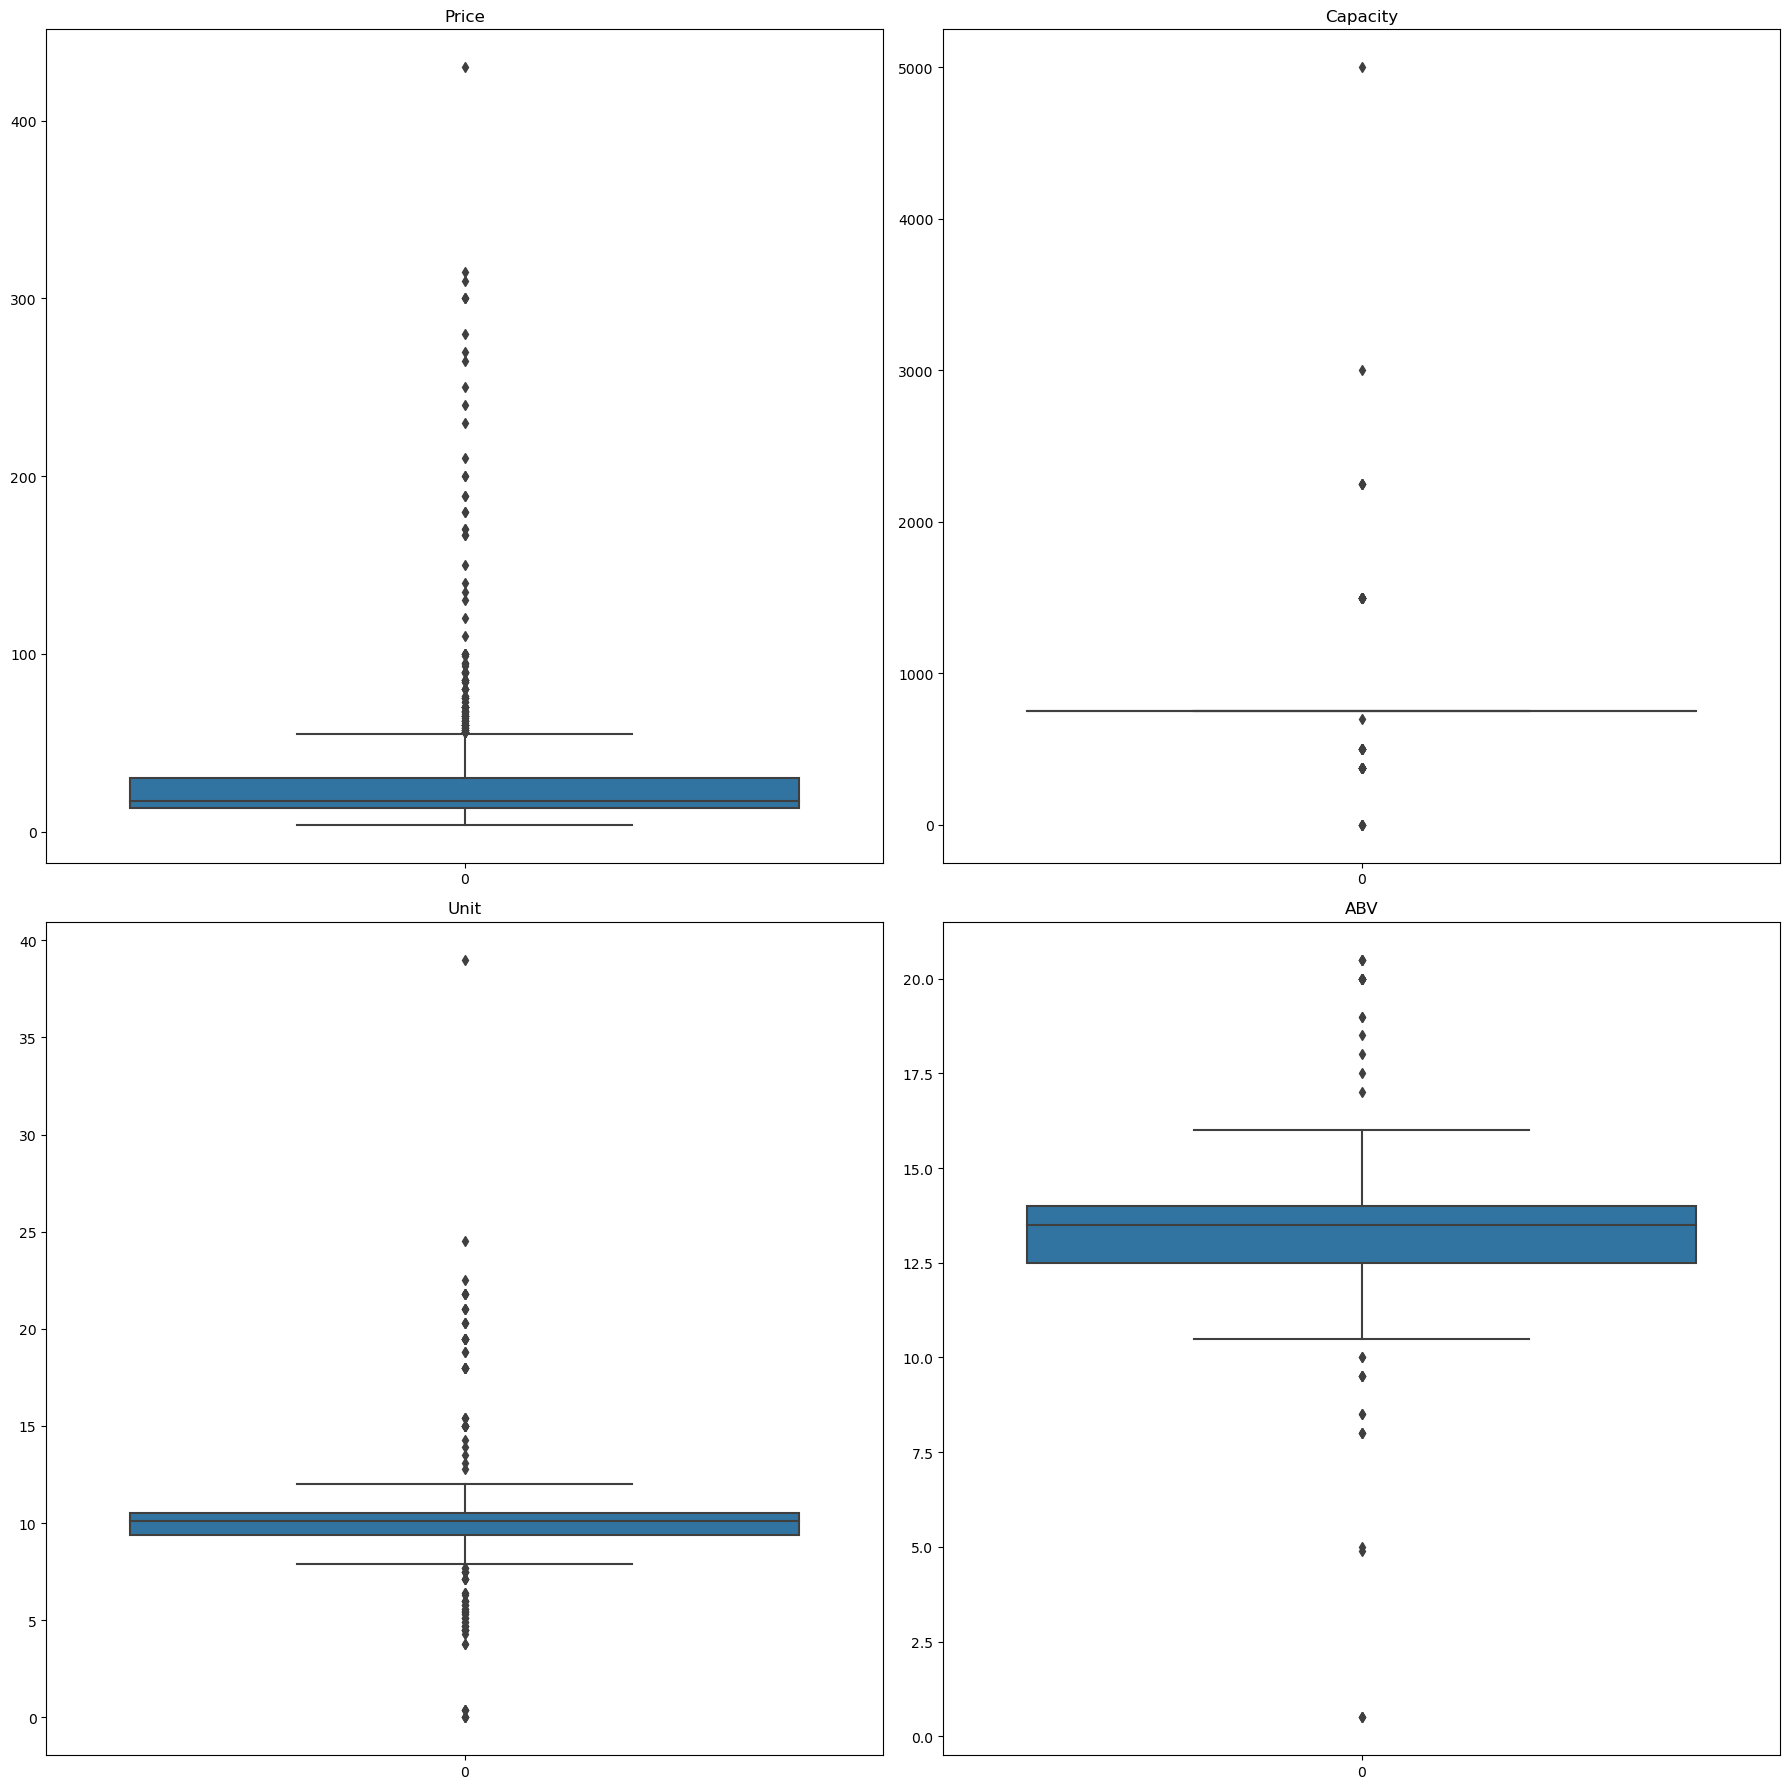

In [46]:
t = 1
plt.rcParams["figure.figsize"]=[18,18]
for i in num:
    plt.subplot(2,2,t)
    sns.boxplot(df[i])
    plt.title(i)
    t +=1
plt.tight_layout()
plt.show()

In [47]:
#Handling outliers by capping values
for i in num:
    if i!='Capacity':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ll=q1-1.5*iqr
        ul=q3+1.5*iqr
        df[i]=np.where(df[i]>ul,ul,df[i])
        df[i]=np.where(df[i]<ll,ll,df[i])

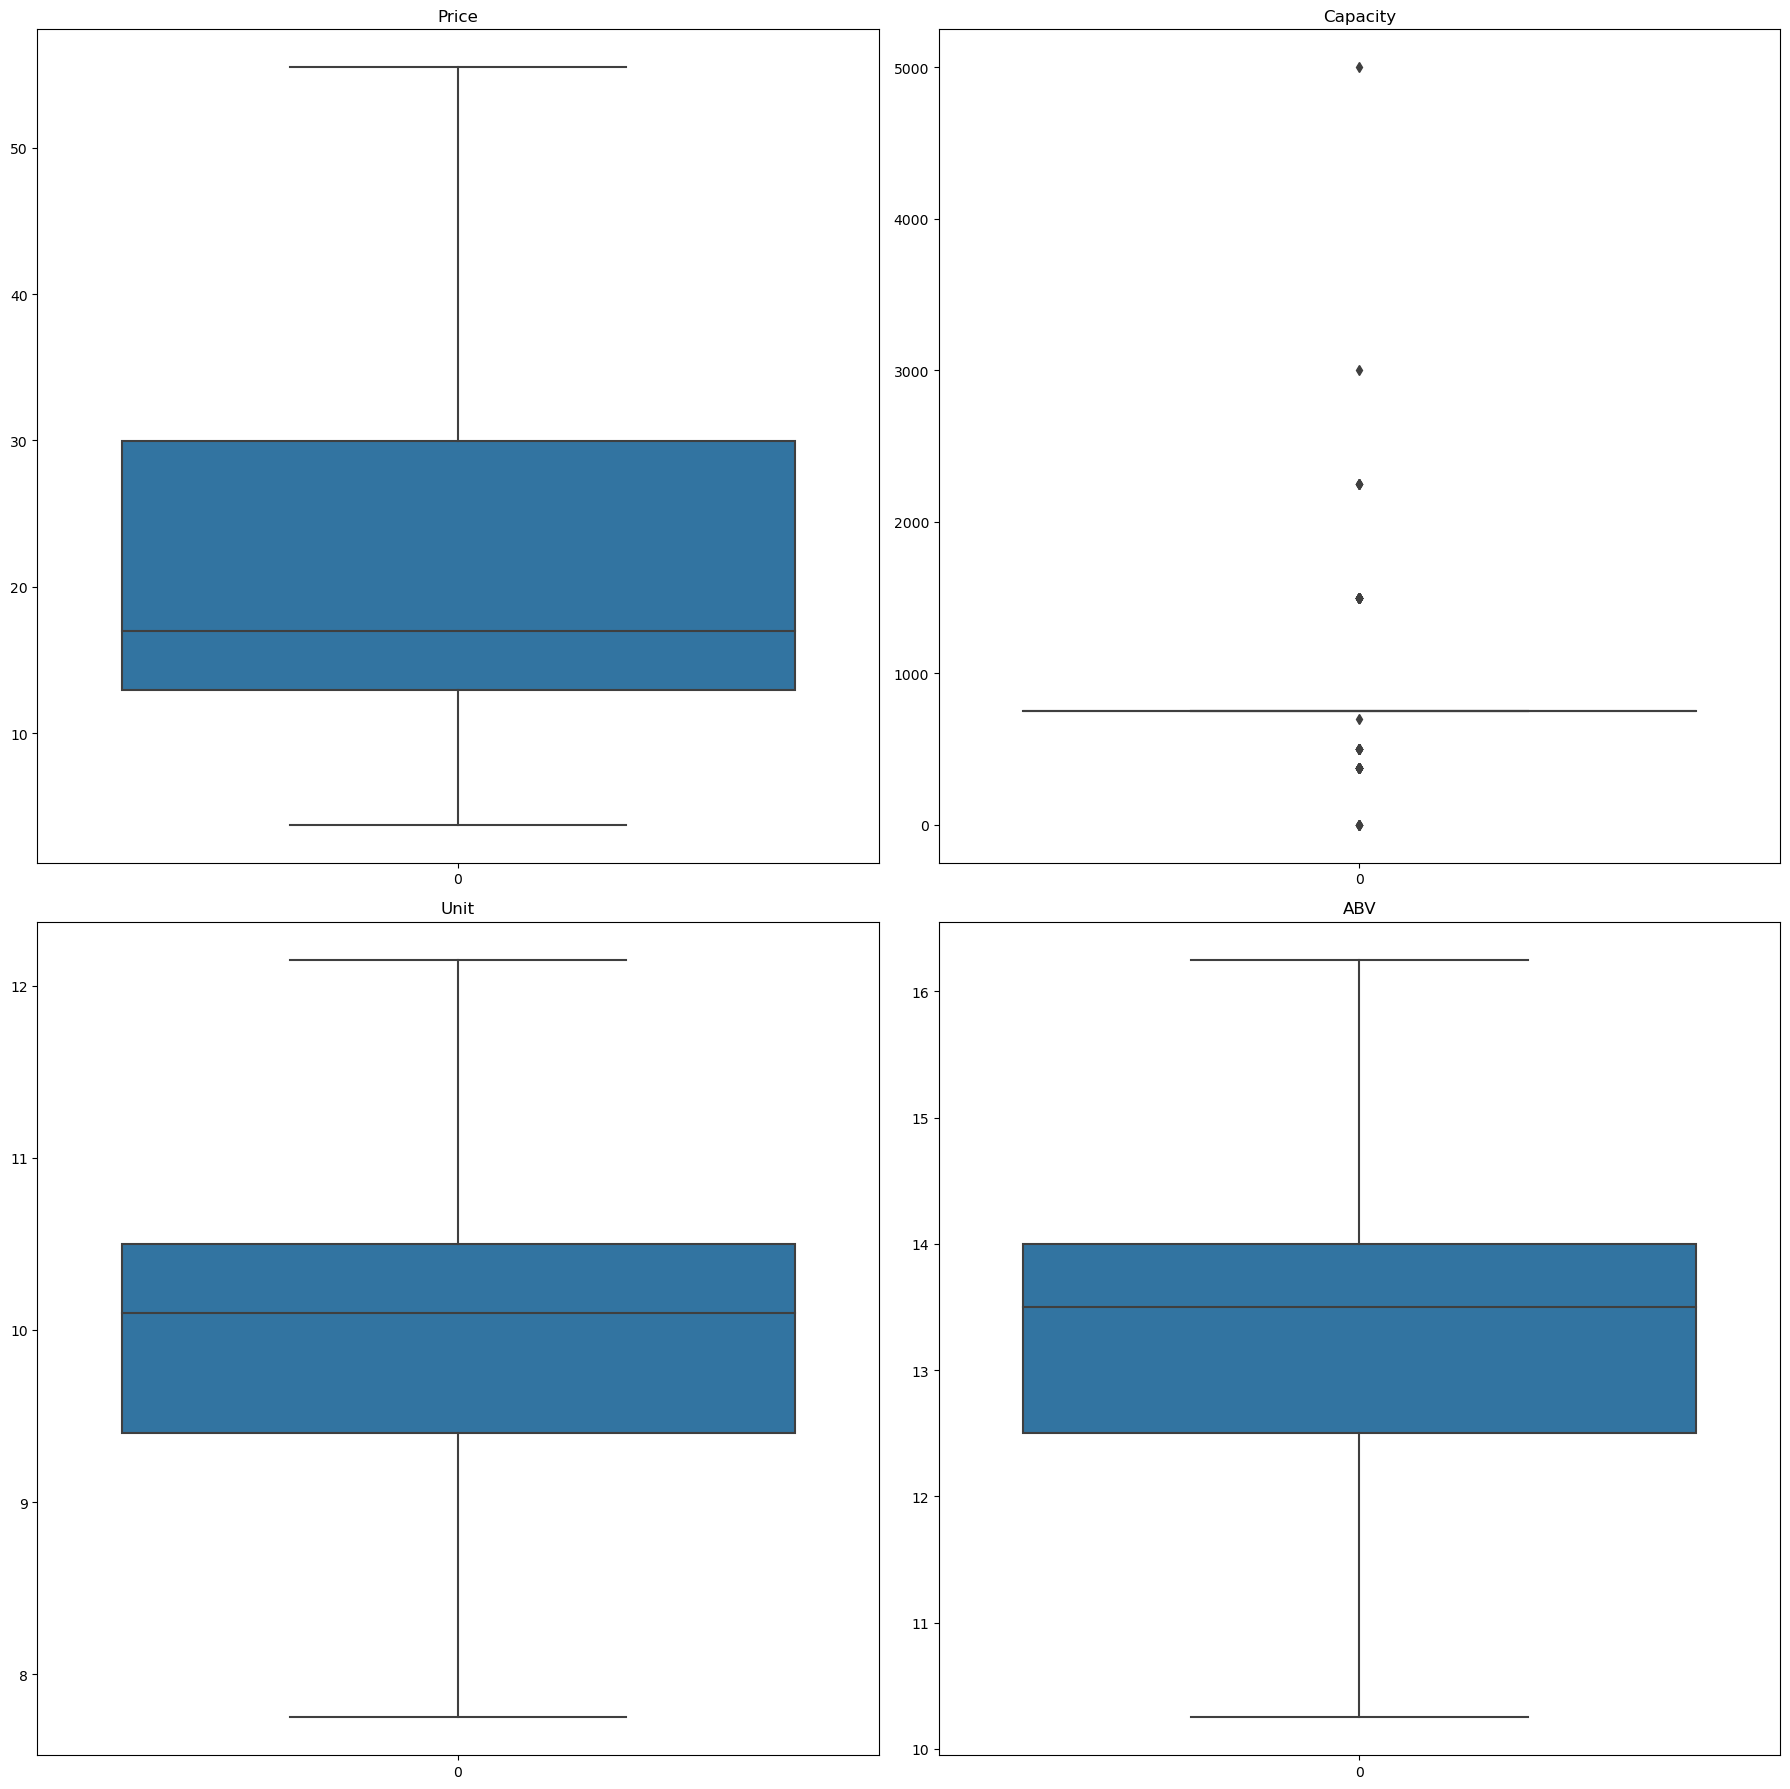

In [48]:
t = 1
plt.rcParams["figure.figsize"]=[18,18]
for i in num:
    plt.subplot(2,2,t)
    sns.boxplot(df[i])
    plt.title(i)
    t +=1
plt.tight_layout()
plt.show()

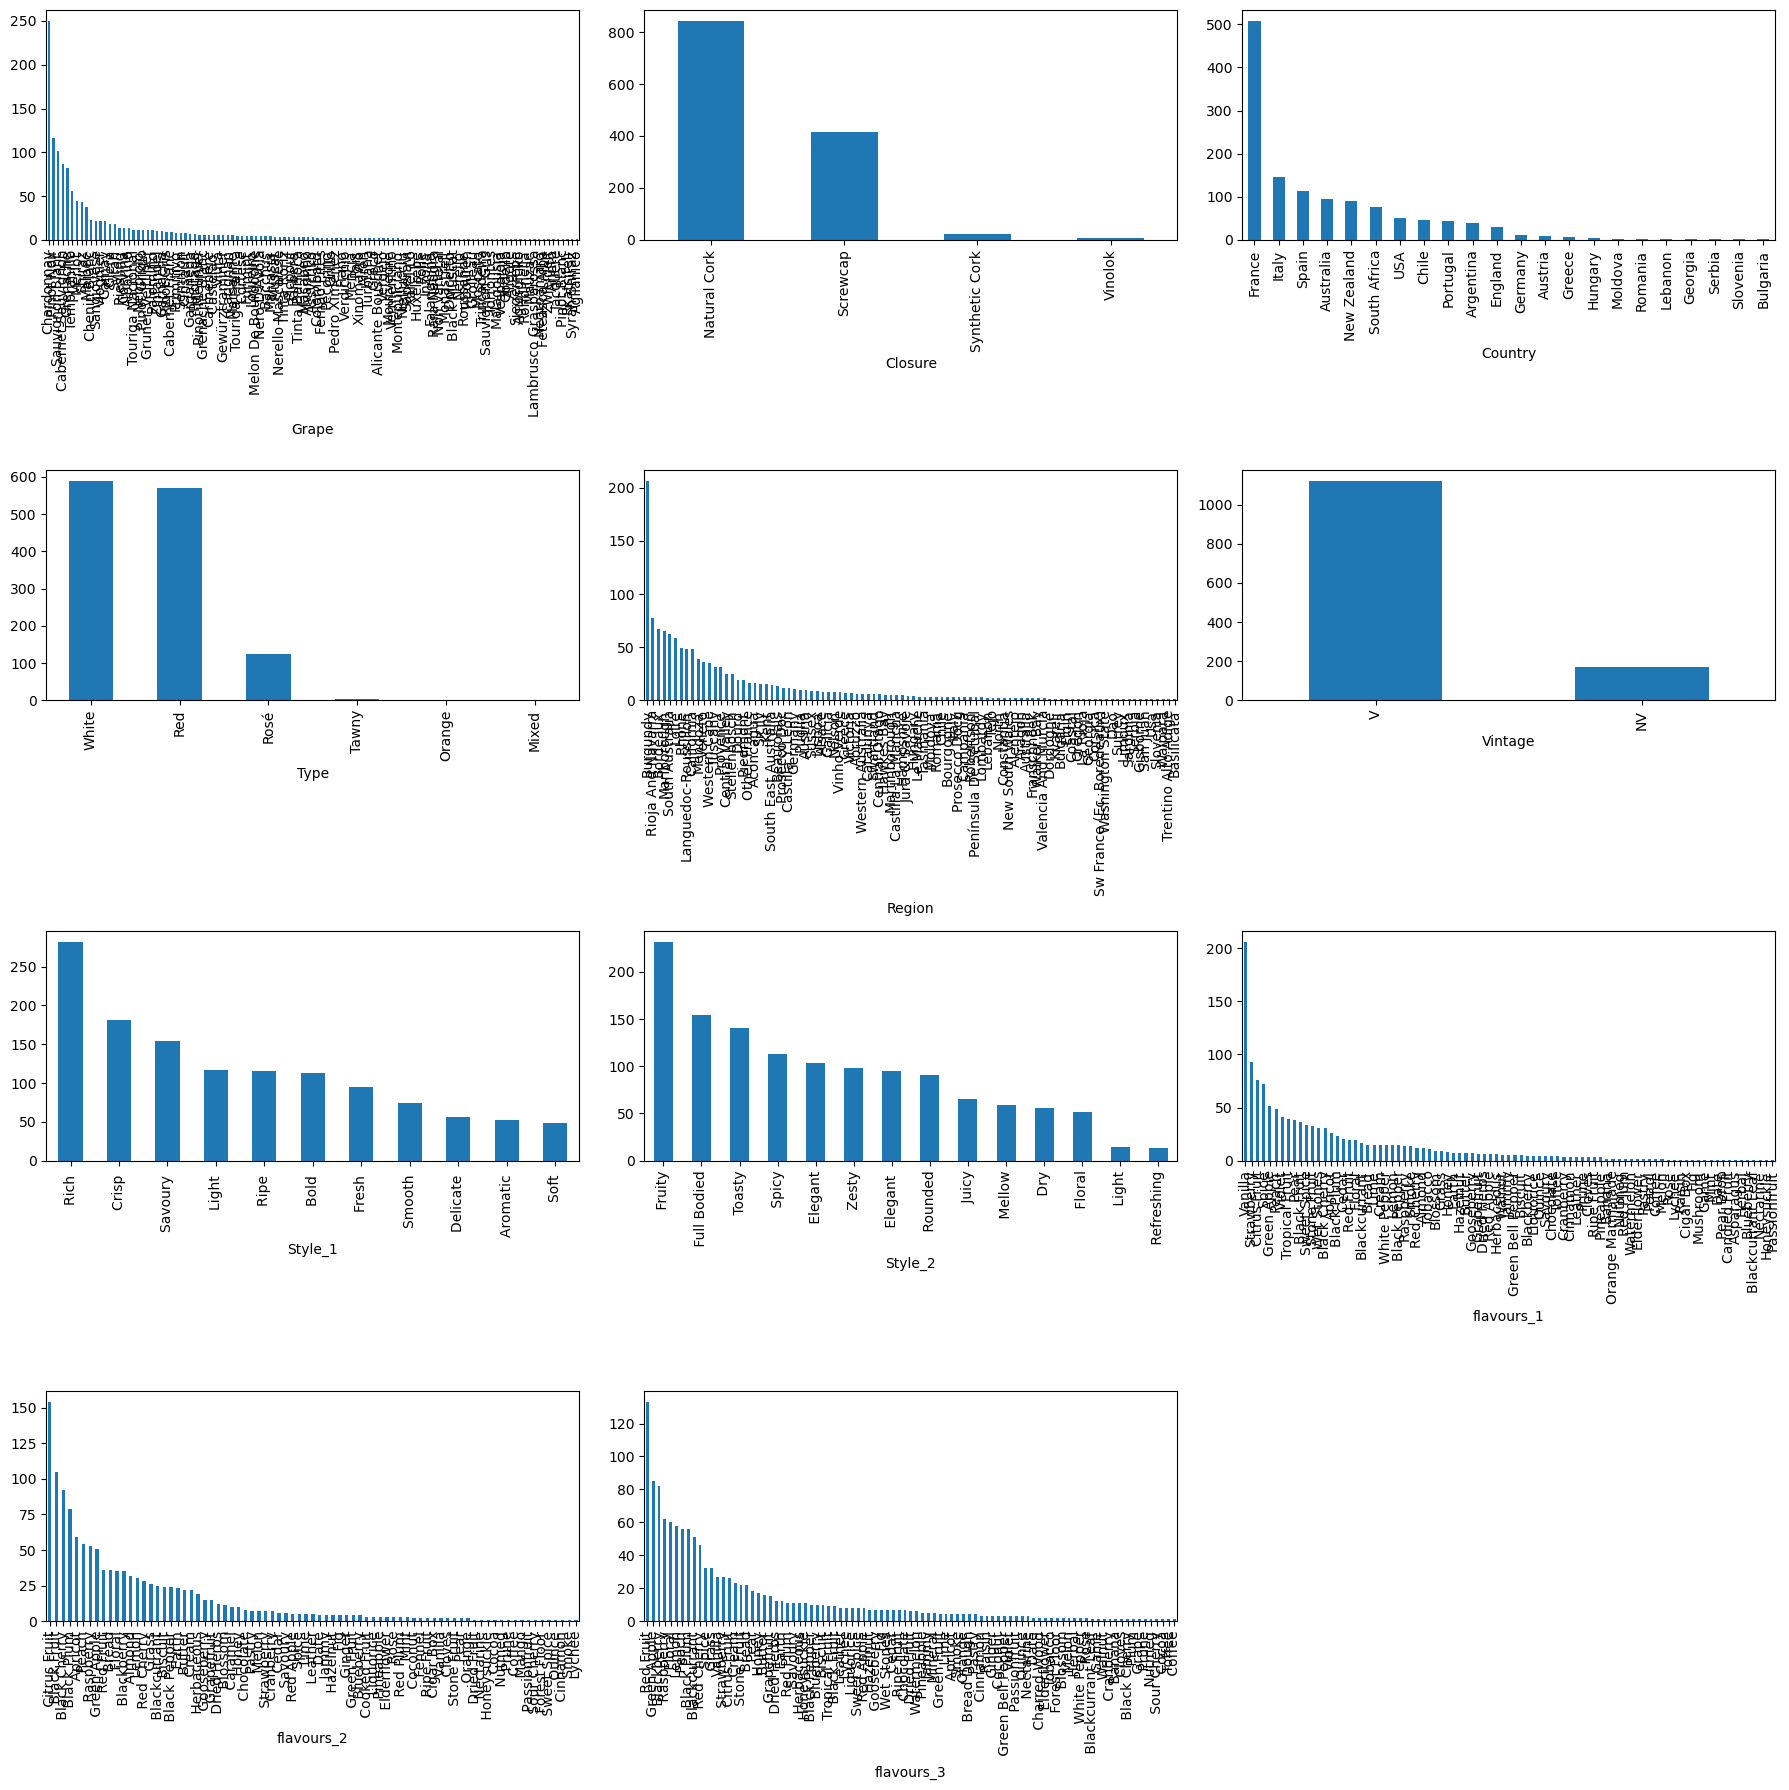

In [49]:
#Univariate Analysis for categorical Columns
t=1
for i in cat:
    plt.subplot(4,3,t)
    df[i].value_counts().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()
    

### Bivarariate Analysis

In [50]:
num

['Price', 'Capacity', 'Unit', 'ABV']

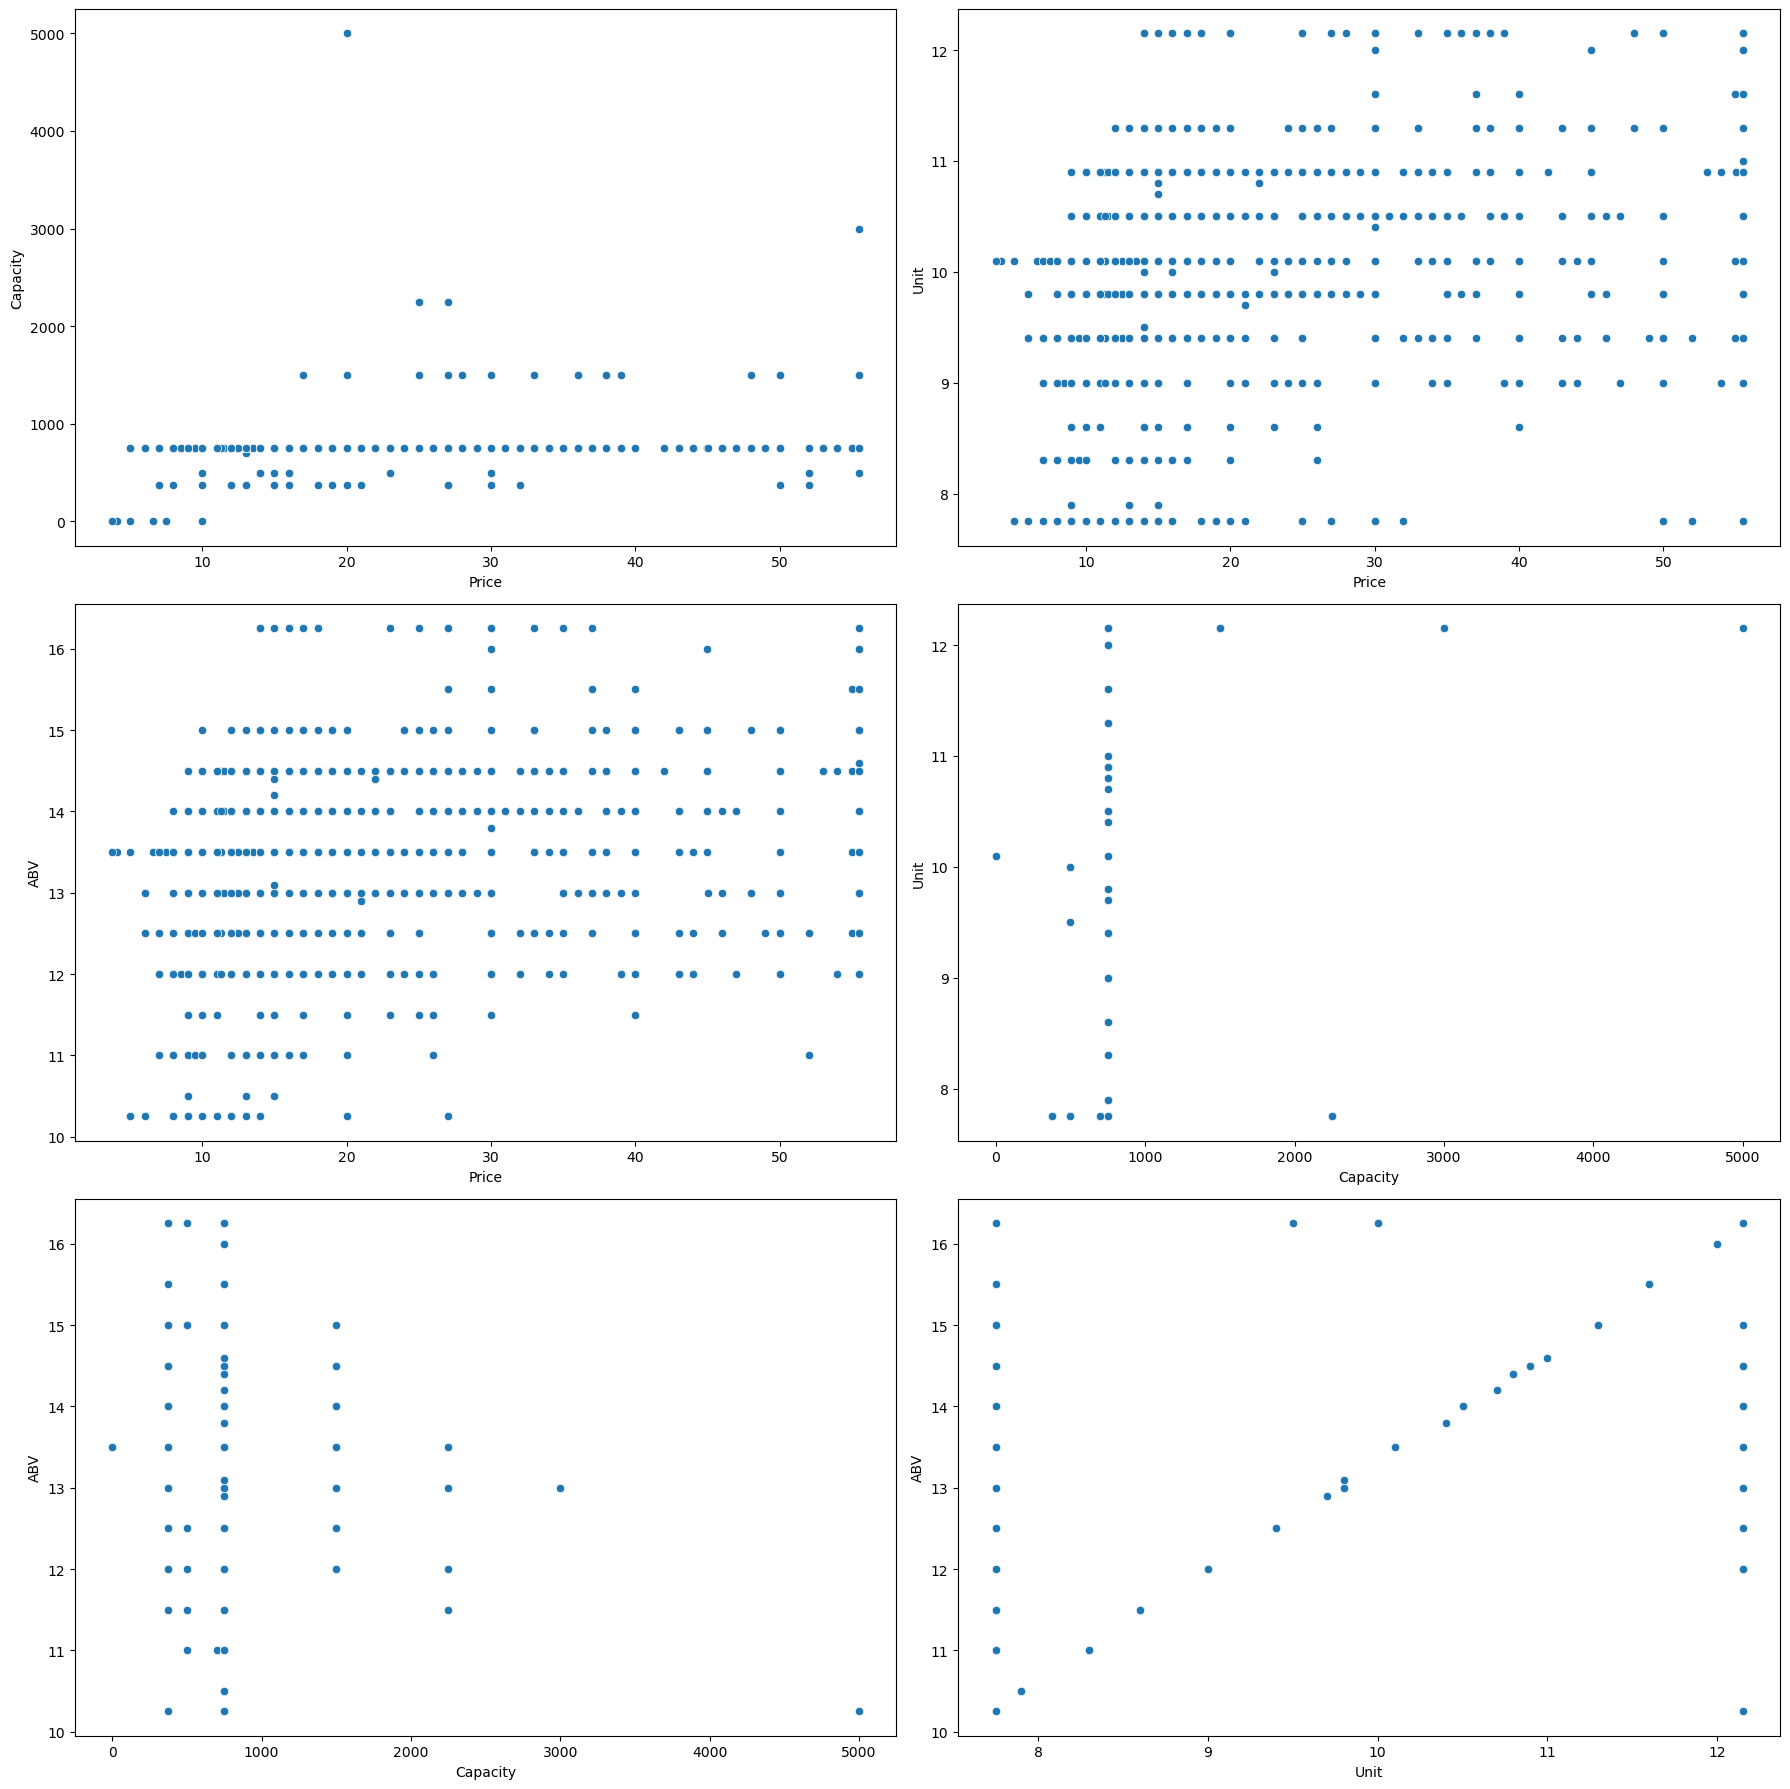

In [51]:
#Bivariate Analysis for num vs num
t=1
for i in num:
    for j in num:
        if num.index(i)<num.index(j):
            plt.subplot(3,2,t)
            sns.scatterplot(data=df,x=i,y=j)
            t+=1
plt.tight_layout()
plt.show()

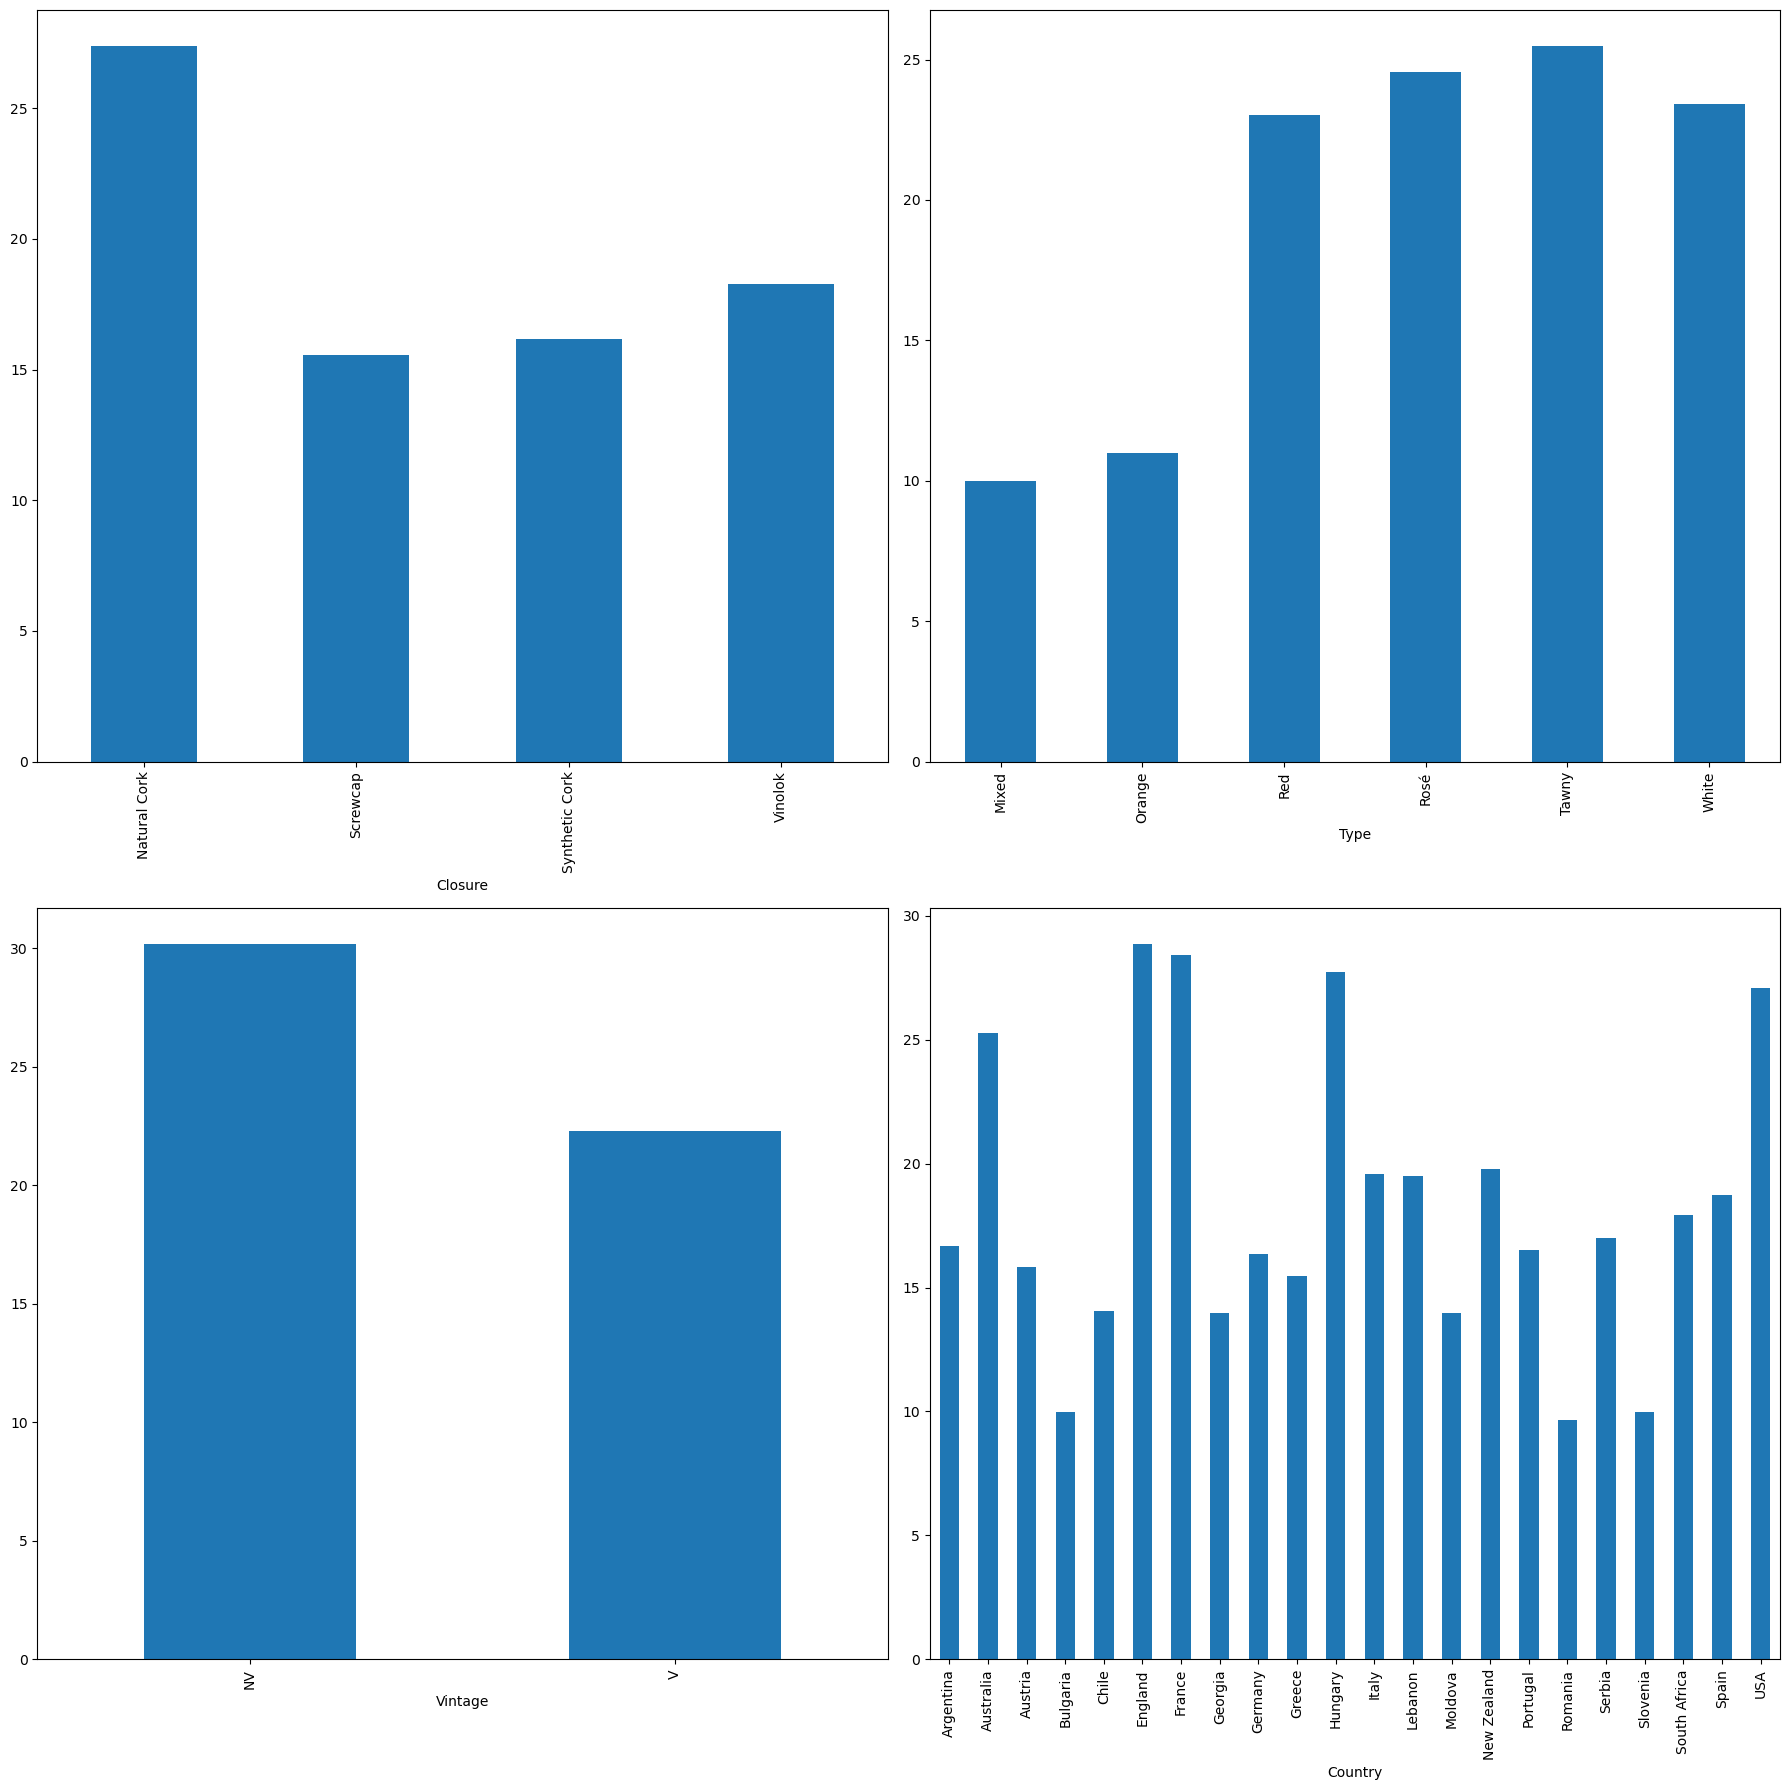

In [52]:
#Bivaraiate Analysis for Cat vs Num Target Price
c=['Closure','Type','Vintage','Country']
t=1
for i in c:
    plt.subplot(2,2,t)
    df.groupby(i)['Price'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()
    

<Axes: xlabel='Closure'>

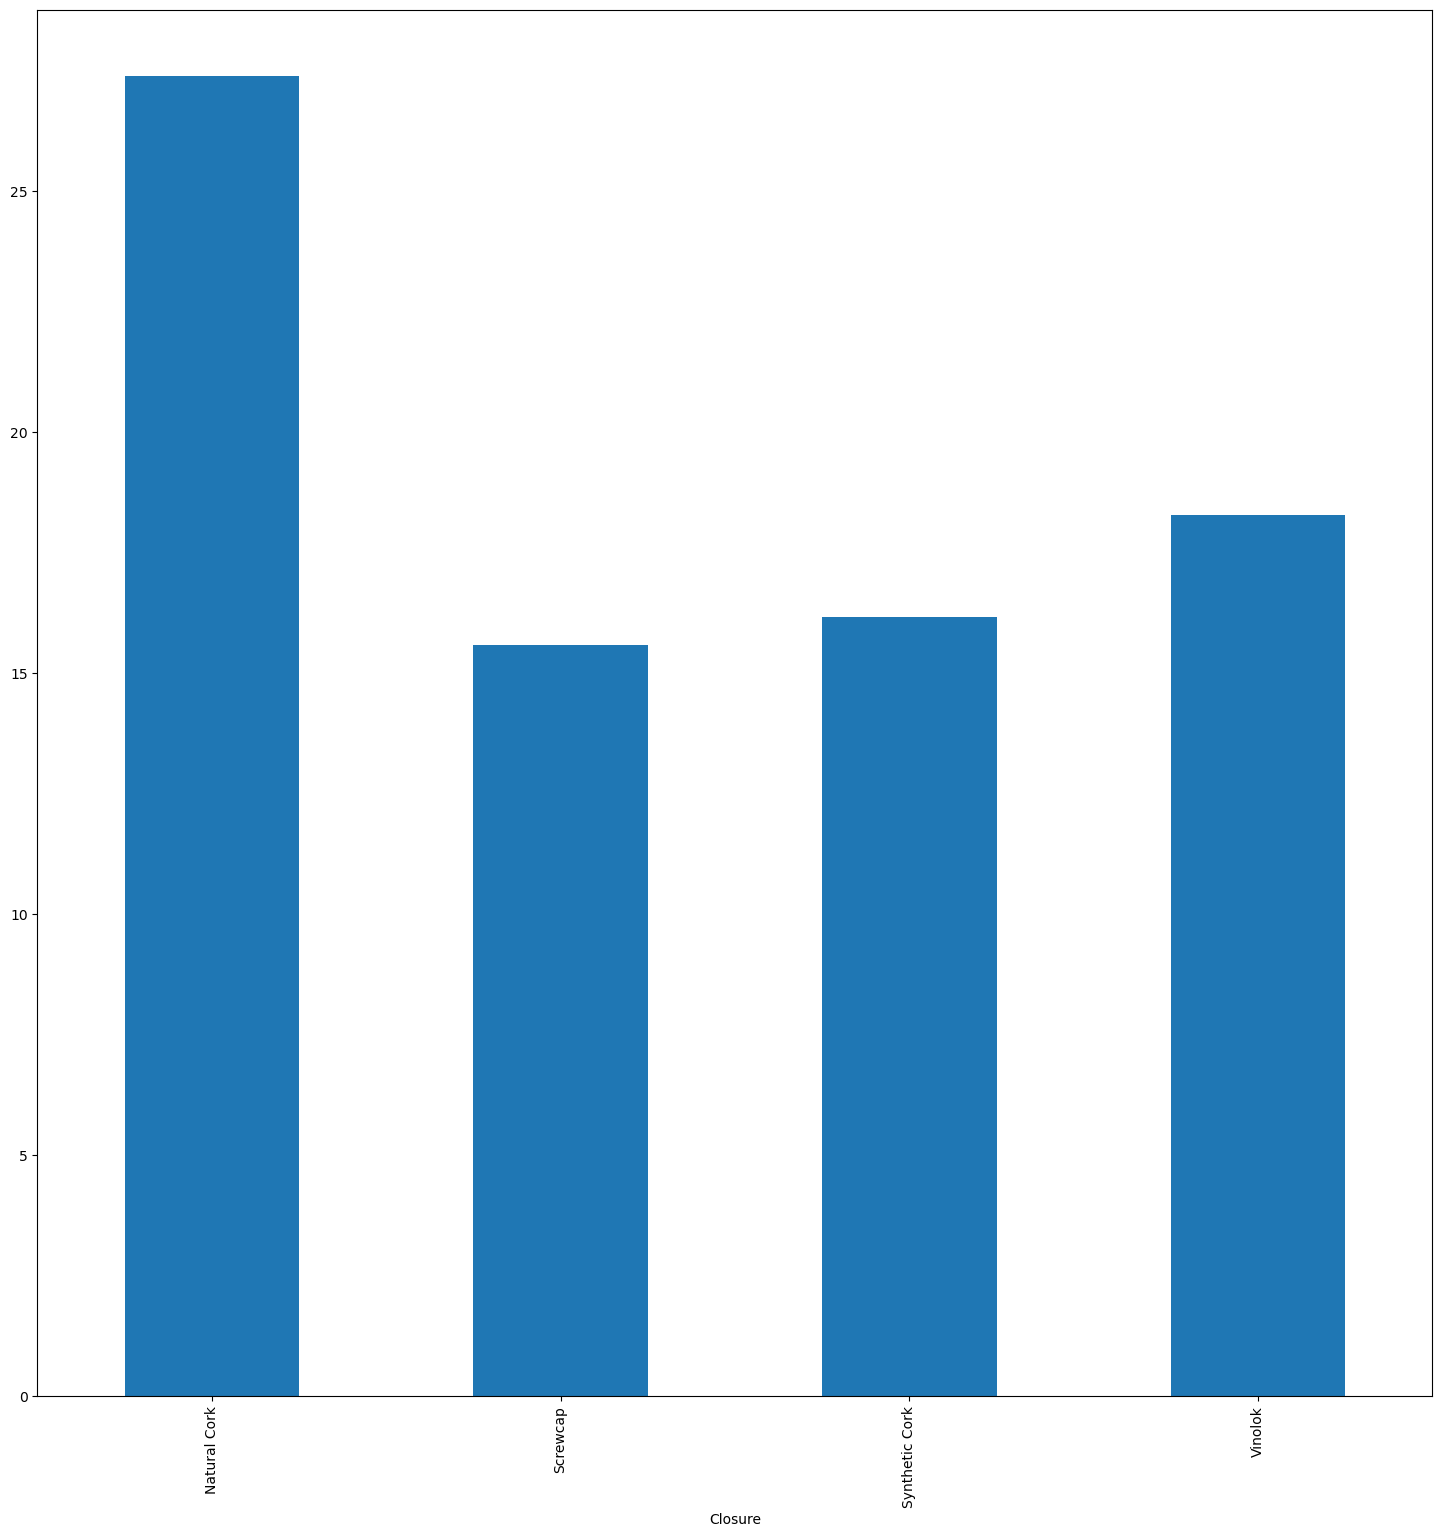

In [53]:
df.groupby('Closure')['Price'].mean().plot(kind='bar')

In [54]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [55]:
df['Closure']=l.fit_transform(df['Closure'])

In [56]:
df=pd.get_dummies(data=df,columns=['Country'],drop_first=True,dtype=int)

In [57]:
df['Type']=l.fit_transform(df[['Type']])

In [58]:
df['Vintage'].replace(to_replace=['V','NV'],value=[1,0],inplace=True)

In [59]:
df.head(3)

,Price,Capacity,Grape,Closure,Unit,Type,ABV,Region,Vintage,Style_1,Style_2,flavours_1,flavours_2,flavours_3,Country_Australia,Country_Austria,Country_Bulgaria,Country_Chile,Country_England,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_Italy,Country_Lebanon,Country_Moldova,Country_New Zealand,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovenia,Country_South Africa,Country_Spain,Country_USA
0,9.99,750.0,Tempranillo,0,10.5,2,14.0,Rioja And Navarra,0,Rich,Juicy,Vanilla,Blackberry,Blackcurrant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15.99,750.0,Chardonnay,0,10.1,5,13.5,California,1,Rich,Toasty,Vanilla,Almond,Coconut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.49,750.0,Sauvignon Blanc,1,9.8,5,13.0,Marlborough,1,Crisp,Zesty,Tropical Fruit,Gooseberry,Grapefruit,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [60]:
#label encoding for Style_1,Style_2,flavours_1,flavours_2,flavours_3
df['Style_1']=l.fit_transform(df[['Style_1']])
df['Style_2']=l.fit_transform(df[['Style_2']])
df['flavours_1']=l.fit_transform(df[['flavours_1']])
df['flavours_2']=l.fit_transform(df[['flavours_2']])
df['flavours_3']=l.fit_transform(df[['flavours_3']])

In [61]:
df['Region']=l.fit_transform(df[['Region']])

In [62]:
df.head(3)

,Price,Capacity,Grape,Closure,Unit,Type,ABV,Region,Vintage,Style_1,Style_2,flavours_1,flavours_2,flavours_3,Country_Australia,Country_Austria,Country_Bulgaria,Country_Chile,Country_England,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_Italy,Country_Lebanon,Country_Moldova,Country_New Zealand,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovenia,Country_South Africa,Country_Spain,Country_USA
0,9.99,750.0,Tempranillo,0,10.5,2,14.0,65,0,6,6,81,7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15.99,750.0,Chardonnay,0,10.1,5,13.5,13,1,6,12,81,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.49,750.0,Sauvignon Blanc,1,9.8,5,13.0,49,1,2,13,80,36,38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [63]:
df['Grape']=l.fit_transform(df[['Grape']])

In [64]:
df.head(3)

,Price,Capacity,Grape,Closure,Unit,Type,ABV,Region,Vintage,Style_1,Style_2,flavours_1,flavours_2,flavours_3,Country_Australia,Country_Austria,Country_Bulgaria,Country_Chile,Country_England,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_Italy,Country_Lebanon,Country_Moldova,Country_New Zealand,Country_Portugal,Country_Romania,Country_Serbia,Country_Slovenia,Country_South Africa,Country_Spain,Country_USA
0,9.99,750.0,94,0,10.5,2,14.0,65,0,6,6,81,7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15.99,750.0,17,0,10.1,5,13.5,13,1,6,12,81,0,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.49,750.0,87,1,9.8,5,13.0,49,1,2,13,80,36,38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x=df.drop(columns='Price')
y=df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=50)

In [67]:
from scipy import stats

In [68]:
def ttest_ind(train,test,feature):
    stat,pval=stats.ttest_ind(train[feature],test[feature])
    return pval

In [69]:
for i in xtrain.columns.to_list():
    pval=ttest_ind(xtrain,xtest,i)
    print(i,":",pval)

Capacity : 0.5625837117924526
Grape : 0.4269230944651998
Closure : 0.14835488297248675
Unit : 0.9342113842121315
Type : 0.3000196856718946
ABV : 0.7943247371193074
Region : 0.6148630992825068
Vintage : 0.1391118075535324
Style_1 : 0.4625617436792493
Style_2 : 0.846038746057872
flavours_1 : 0.7595531351234384
flavours_2 : 0.31838369264205824
flavours_3 : 0.4799030405697823
Country_Australia : 0.8451671410548075
Country_Austria : 0.487012146531386
Country_Bulgaria : 0.5124339484178424
Country_Chile : 0.7881117086491535
Country_England : 0.1083997054433168
Country_France : 0.1480921603712797
Country_Georgia : 0.5382715853417802
Country_Germany : 0.8404355193242459
Country_Greece : 0.11706705368295563
Country_Hungary : 0.383705181248434
Country_Italy : 0.023725597691406863
Country_Lebanon : 0.35401909871877835
Country_Moldova : 0.2561001948451196
Country_New Zealand : 0.3034025059766958
Country_Portugal : 0.1581466168030131
Country_Romania : 0.2561001948451196
Country_Serbia : 0.5124339484

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
vif=[]
for i in range(xtrain.shape[1]):
    vif.append(variance_inflation_factor(xtrain.values,i))
vif

[27.3009001875246,
 4.273308860150823,
 2.1549399507338687,
 530.3681919060137,
 9.016920609612482,
 476.95227191746784,
 8.146864489208161,
 10.41340670106555,
 5.630927748978088,
 4.509251401629464,
 5.063751706351747,
 4.562199621794703,
 8.256023190941487,
 3.8776367868740405,
 1.4064258611992873,
 1.0471438801367032,
 2.4627635627095996,
 1.621002622487377,
 15.146714201635069,
 1.0458869089222955,
 1.3158800321762054,
 1.12218431469709,
 1.0793189765005364,
 4.370733106420333,
 1.0849647477302948,
 1.1306416816791958,
 4.001139335807992,
 2.3875671665261917,
 1.1210226743920693,
 1.0495618778018756,
 1.0488656869667103,
 3.155972088998625,
 3.848601685788923,
 2.7085063995736935]

In [72]:
import statsmodels.api as sm
x_c=sm.add_constant(xtrain)
ols_pred=sm.OLS(ytrain,x_c)
ols_model=ols_pred.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     12.55
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           9.80e-55
Time:                        19:09:30   Log-Likelihood:                -3499.7
No. Observations:                 901   AIC:                             7069.
Df Residuals:                     866   BIC:                             7238.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.6513      7.893     -0.336      0.737     -18.143      12.841
Capacity                 0.0141      0.003      5.152      0.000       0.009       0.019
Grape                    0.0024      0.014      0.175      0.861      -0.024       0.029
Closure                 -7.7910      0.876     -8.895      0.000      -9.510      -6.072
Unit                     2.3645      0.915      2.584      0.010       0.568       4.161
Type                     0.5204      0.350      1.488      0.137      -0.166       1.207
ABV                     -0.0805      0.774     -0.104      0.917      -1.600       1.439
Region                  -0.1477      0.022     -6.619      0.000      -0.192      -0.104
Vintage                 -4.9347      1.377     -3.583      0.000      -7.638      -2.232
Style_1                  0.0252      0.168      0.150      0.881      -0.305       0.355
Style_2                  0.1411      0.111      1.275      0.203      -0.076       0.358
flavours_1              -0.0122      0.015     -0.815      0.415      -0.042       0.017
flavours_2              -0.0256      0.026     -1.005      0.315      -0.076       0.024
flavours_3              -0.0326      0.022     -1.453      0.146      -0.077       0.011
Country_Australia       14.2138      2.951      4.817      0.000       8.422      20.005
Country_Austria         -2.6977      5.110     -0.528      0.598     -12.727       7.332
Country_Bulgaria        -7.2613     12.354     -0.588      0.557     -31.508      16.985
Country_Chile           -6.6805      3.384     -1.974      0.049     -13.323      -0.038
Country_England          9.9752      3.951      2.525      0.012       2.221      17.729
Country_France           7.1998      2.620      2.748      0.006       2.058      12.342
Country_Georgia         -9.1190     12.378     -0.737      0.461     -33.413      15.175
Country_Germany          1.3709      5.033      0.272      0.785      -8.507      11.249
Country_Greece           1.9852      7.404      0.268      0.789     -12.547      16.518
Country_Hungary          8.4031      8.905      0.944      0.346      -9.074      25.880
Country_Italy            6.4960      2.783      2.334      0.020       1.033      11.959
Country_Lebanon         -2.8442      8.878     -0.320      0.749     -20.270      14.582
Country_Moldova          4.1478      7.409      0.560      0.576     -10.394      18.689
Country_New Zealand      7.8412      3.002      2.612      0.009       1.949      13.733
Country_Portugal        -2.5122      3.214     -0.782      0.435      -8.821       3.797
Country_Romania          1.9166      7.384      0.260      0.795     -12.576      16.409
Country_Serbia           2.2110     12.307      0.180      0.857     -21.944      26.366
Country_Slovenia         1.9530     12.314      0.159    

In [73]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [98]:
mod=[]
map=[]
ma=[]
ms=[]
r=[]
def metric(model,x_train,x_test,y_train,y_test):
    m=model
    mo=m.fit(x_train,y_train)
    pred=mo.predict(x_test)
    mape=(mean_absolute_percentage_error(y_test,pred))
    mae=(mean_absolute_error(y_test,pred))
    mse=(mean_squared_error(y_test,pred))
    r2=(r2_score(y_test,pred))
    print ('\n','Mean_absolute_percentage_error :',mape,'\n','Mean_absolute_error :',mae,'\n',
           'Mean_squared_error :',mse,'\n','R2_score :',r2)
    
    
    inp=input('Do you want to save the model in score card? Y/N')
    if inp.lower()=='y':
        global scorecard
        mod.append(str(model))
        map.append(mape)
        ma.append(mae)
        ms.append(mse)
        r.append(r2)
        scorecard=pd.DataFrame({'model':mod,'mean_absolute_percentage_error':map,
                               'mean_absolute_error':ma,'mean_squared_error':ms
                               ,'R2_score':r})
    else:
        return('Not saved in scorecard')
    

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor,VotingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [100]:
metric(LinearRegression(),xtrain,xtest,ytrain,ytest)


 Mean_absolute_percentage_error : 0.49166518528378955 
 Mean_absolute_error : 10.378798943070711 
 Mean_squared_error : 184.26126568665148 
 R2_score : 0.24684494802140233
Do you want to save the model in score card? Y/Ny


In [101]:
metric(AdaBoostRegressor(),xtrain,xtest,ytrain,ytest)


 Mean_absolute_percentage_error : 0.4864171566783882 
 Mean_absolute_error : 9.570718452878262 
 Mean_squared_error : 144.49876229358355 
 R2_score : 0.40937140304278863
Do you want to save the model in score card? Y/Ny


In [102]:
metric(GradientBoostingRegressor(),xtrain,xtest,ytrain,ytest)


 Mean_absolute_percentage_error : 0.36151311807340397 
 Mean_absolute_error : 7.964013253091325 
 Mean_squared_error : 118.15952835025855 
 R2_score : 0.5170311818668221
Do you want to save the model in score card? Y/Ny


In [103]:
metric(RandomForestRegressor(),xtrain,xtest,ytrain,ytest)


 Mean_absolute_percentage_error : 0.34279101523130945 
 Mean_absolute_error : 7.423516482085009 
 Mean_squared_error : 110.88002507350058 
 R2_score : 0.5467856430030467
Do you want to save the model in score card? Y/Ny


In [104]:
metric(DecisionTreeRegressor(),xtrain,xtest,ytrain,ytest)


 Mean_absolute_percentage_error : 0.4128614952559428 
 Mean_absolute_error : 8.877004429678848 
 Mean_squared_error : 178.94899052489643 
 R2_score : 0.268558501657684
Do you want to save the model in score card? Y/Ny


In [105]:
metric(XGBRegressor(),xtrain,xtest,ytrain,ytest) 


 Mean_absolute_percentage_error : 0.3552764106998559 
 Mean_absolute_error : 7.807054556453156 
 Mean_squared_error : 121.93863052230851 
 R2_score : 0.5015843657266195
Do you want to save the model in score card? Y/Ny


In [106]:
base_learners=[('DT_4',DecisionTreeRegressor(max_depth=4)),
               ('RF',RandomForestRegressor(n_estimators=120,max_depth=5)),
               ('DT_6',DecisionTreeRegressor(max_depth=6)),
               ('XGB',XGBRegressor(max_depth=4,n_estimators=100))]

In [107]:
metric(StackingRegressor(estimators=base_learners),xtrain,xtest,ytrain,ytest)


 Mean_absolute_percentage_error : 0.3441860146875035 
 Mean_absolute_error : 7.5878167064714335 
 Mean_squared_error : 113.45074574745789 
 R2_score : 0.5362780018251698
Do you want to save the model in score card? Y/Ny


In [108]:
metric(VotingRegressor(estimators=base_learners),xtrain,xtest,ytrain,ytest)


 Mean_absolute_percentage_error : 0.3580187917222577 
 Mean_absolute_error : 7.851959989151834 
 Mean_squared_error : 120.91675354211479 
 R2_score : 0.5057612165002506
Do you want to save the model in score card? Y/Ny


In [109]:
scorecard

,model,mean_absolute_percentage_error,mean_absolute_error,mean_squared_error,R2_score
0,LinearRegression(),0.491665,10.378799,184.261266,0.246845
1,AdaBoostRegressor(),0.486417,9.570718,144.498762,0.409371
2,GradientBoostingRegressor(),0.361513,7.964013,118.159528,0.517031
3,RandomForestRegressor(),0.342791,7.423516,110.880025,0.546786
4,DecisionTreeRegressor(),0.412861,8.877004,178.948991,0.268559
5,"XGBRegressor(base_score=None, booster=None, ca...",0.355276,7.807055,121.938631,0.501584
6,"StackingRegressor(estimators=[('DT_4', Decisio...",0.344186,7.587817,113.450746,0.536278
7,"VotingRegressor(estimators=[('DT_4', DecisionT...",0.358019,7.851960,120.916754,0.505761


# Since mape value for Random forest is less we take Random forest

In [110]:
depth=[4,6,8,10]

In [113]:
for i in depth:
    print('the depth value is',i)
    metric(RandomForestRegressor(max_depth=i),xtrain,xtest,ytrain,ytest)

the depth value is 4

 Mean_absolute_percentage_error : 0.40360786939107496 
 Mean_absolute_error : 8.626455142404343 
 Mean_squared_error : 137.9500016882875 
 R2_score : 0.43613900455522325
Do you want to save the model in score card? Y/Nn
the depth value is 6

 Mean_absolute_percentage_error : 0.3672411981382413 
 Mean_absolute_error : 7.986223303279358 
 Mean_squared_error : 122.8445504002245 
 R2_score : 0.49788148150839995
Do you want to save the model in score card? Y/Nn
the depth value is 8

 Mean_absolute_percentage_error : 0.35202860975545225 
 Mean_absolute_error : 7.651471190046014 
 Mean_squared_error : 116.59825525045983 
 R2_score : 0.5234127765999841
Do you want to save the model in score card? Y/Nn
the depth value is 10

 Mean_absolute_percentage_error : 0.3440942438443159 
 Mean_absolute_error : 7.496947089117577 
 Mean_squared_error : 113.79820729466667 
 R2_score : 0.5348577770227763
Do you want to save the model in score card? Y/Nn


# The depth value of 10 gives the less the error value